# Nikita Kiran More(Batch May 2024)

# Timeseries

# Data Preparation and Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv("exchange_rate.csv")

In [4]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [5]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [6]:
df.head

<bound method NDFrame.head of                   date   Ex_rate
0     01-01-1990 00:00  0.785500
1     02-01-1990 00:00  0.781800
2     03-01-1990 00:00  0.786700
3     04-01-1990 00:00  0.786000
4     05-01-1990 00:00  0.784900
...                ...       ...
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825

[7588 rows x 2 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [8]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [9]:
df['data']=pd.to_datetime(df['date'])

In [10]:
df['date']

0       01-01-1990 00:00
1       02-01-1990 00:00
2       03-01-1990 00:00
3       04-01-1990 00:00
4       05-01-1990 00:00
              ...       
7583    06-10-2010 00:00
7584    07-10-2010 00:00
7585    08-10-2010 00:00
7586    09-10-2010 00:00
7587    10-10-2010 00:00
Name: date, Length: 7588, dtype: object

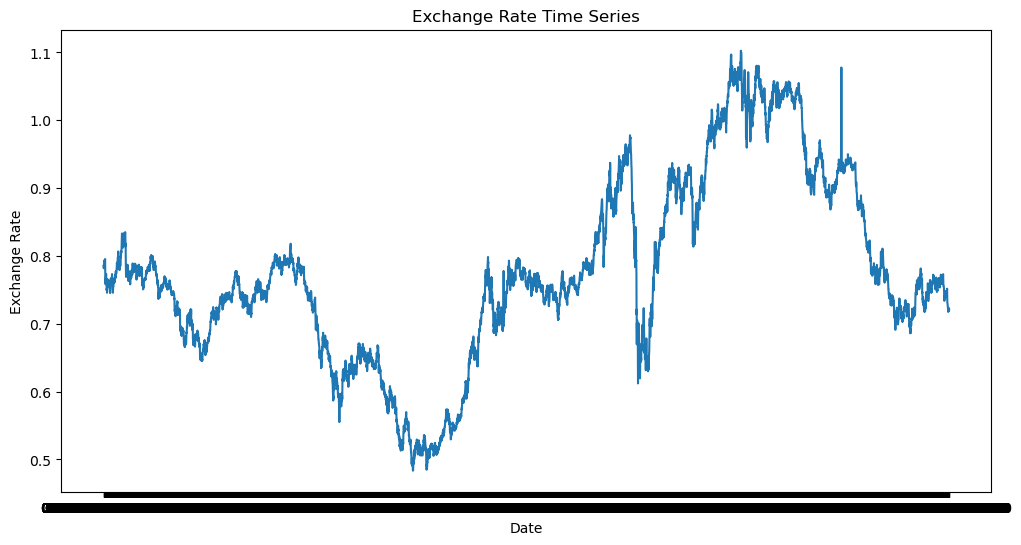

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Ex_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.show()

In [12]:
print(df.isnull().sum())

date       0
Ex_rate    0
data       0
dtype: int64


In [15]:
Q1 = df['Ex_rate'].quantile(0.25)
Q3 = df['Ex_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['Ex_rate'] < lower_bound) | (df['Ex_rate'] > upper_bound)]

In [14]:
print(anomalies)

Empty DataFrame
Columns: [date, Ex_rate, data]
Index: []


# Model Building - ARIMA


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\91940\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

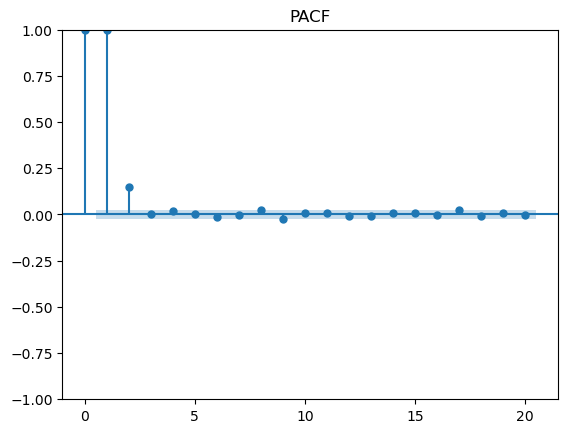

In [18]:
plt.figure(figsize=(12,6))
plot_pacf(df['Ex_rate'], lags=20)
plt.title('PACF')
plt.show()

<Figure size 1200x600 with 0 Axes>

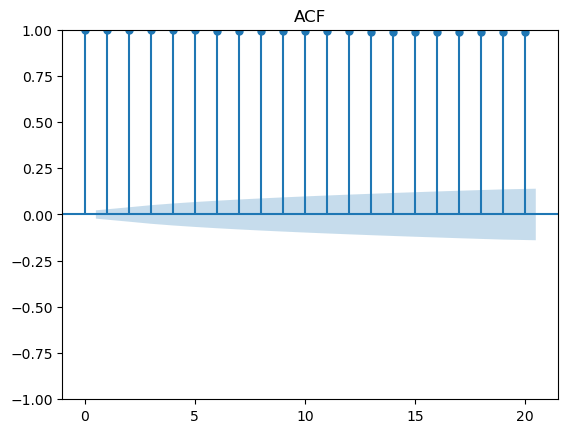

In [17]:
plt.figure(figsize=(12,6))
plot_acf(df['Ex_rate'], lags=20)
plt.title('ACF')
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Ex_rate'], order=(1,1,1))
model_fit = model.fit()

In [20]:
model

In [21]:
model_fit

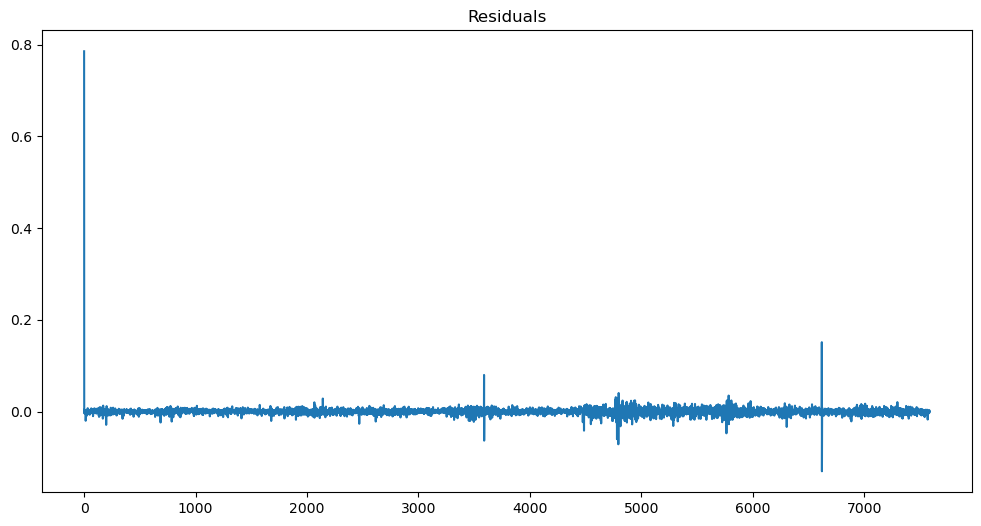

In [22]:
residuals = model_fit.resid
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

<Figure size 1200x600 with 0 Axes>

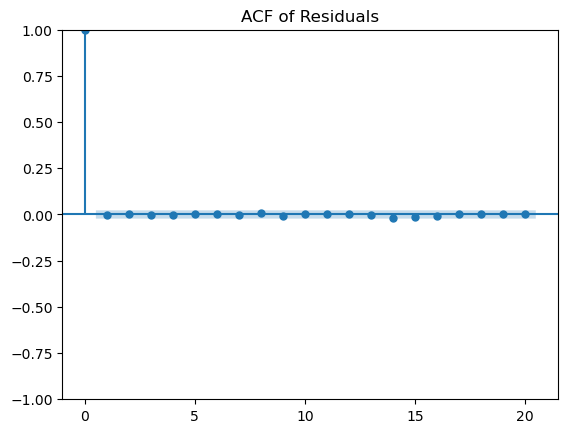

In [23]:
plt.figure(figsize=(12,6))
plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

In [24]:

train_size = int(len(df) * 0.8)
train, test = df['Ex_rate'][:train_size], df['Ex_rate'][train_size:]

In [25]:
train_size

6070

In [26]:
train, test

(0       0.785500
 1       0.781800
 2       0.786700
 3       0.786000
 4       0.784900
           ...   
 6065    1.022620
 6066    1.027591
 6067    1.022349
 6068    1.023395
 6069    1.023552
 Name: Ex_rate, Length: 6070, dtype: float64,
 6070    1.025347
 6071    1.026905
 6072    1.037344
 6073    1.038875
 6074    1.032855
           ...   
 7583    0.718494
 7584    0.721839
 7585    0.723197
 7586    0.720825
 7587    0.720825
 Name: Ex_rate, Length: 1518, dtype: float64)

In [27]:
model_fit = ARIMA(train, order=(1,1,1)).fit()
model_fit


In [28]:
forecast, stderr, conf_int = model_fit.forecast(steps=3)
forecast, stderr, conf_int


(1.0236854843006686, 1.0236057676464183, 1.0236533743307477)

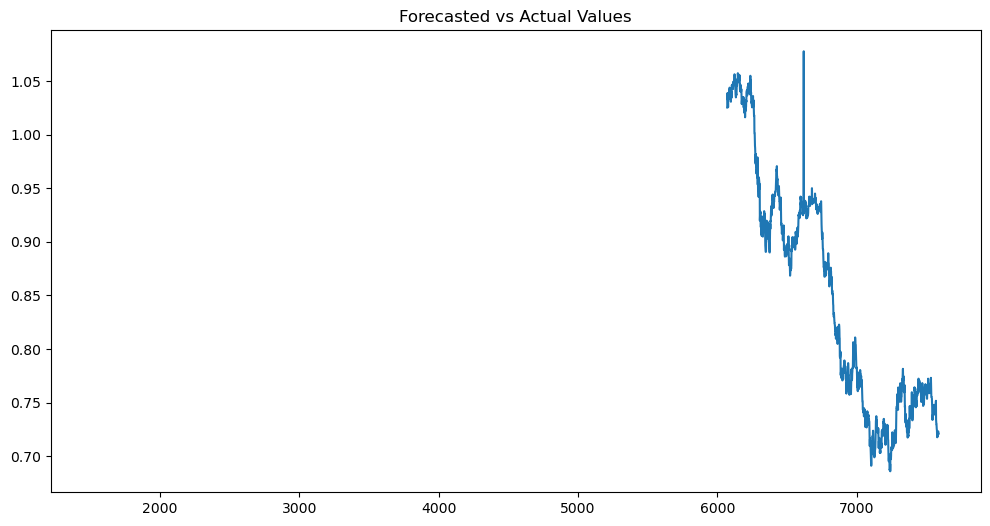

In [29]:
forecast_value, stderr, conf_int = model_fit.forecast(steps=3)

forecast_list = [forecast_value] * 3
conf_int_list = [conf_int] * 3

plt.figure(figsize=(12,6))
plt.plot(test)
plt.plot(range(len(test), len(test)+3), forecast_list)
plt.title('Forecasted vs Actual Values')
plt.show()

# Model Building - Exponential Smoothing

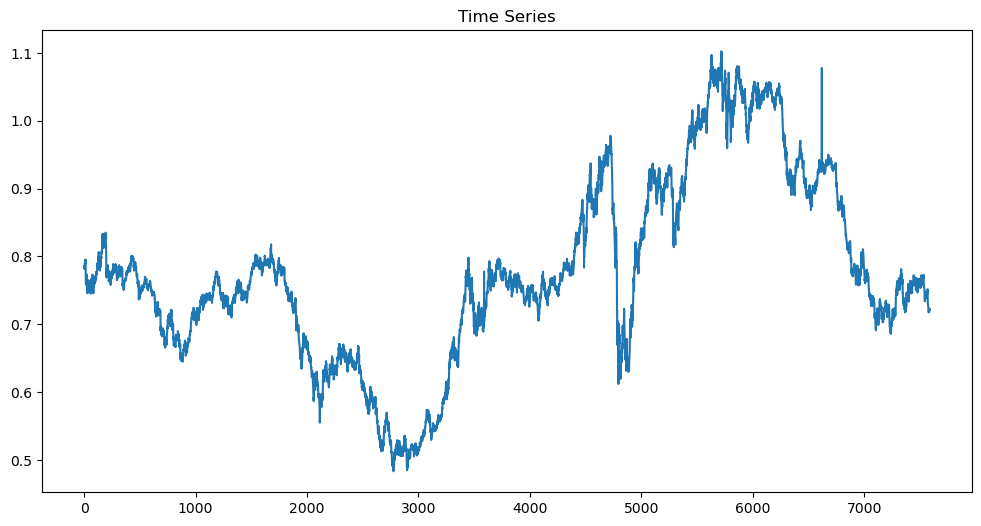

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'])
plt.title('Time Series')
plt.show()

In [31]:
decomposition = seasonal_decompose(df['Ex_rate'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

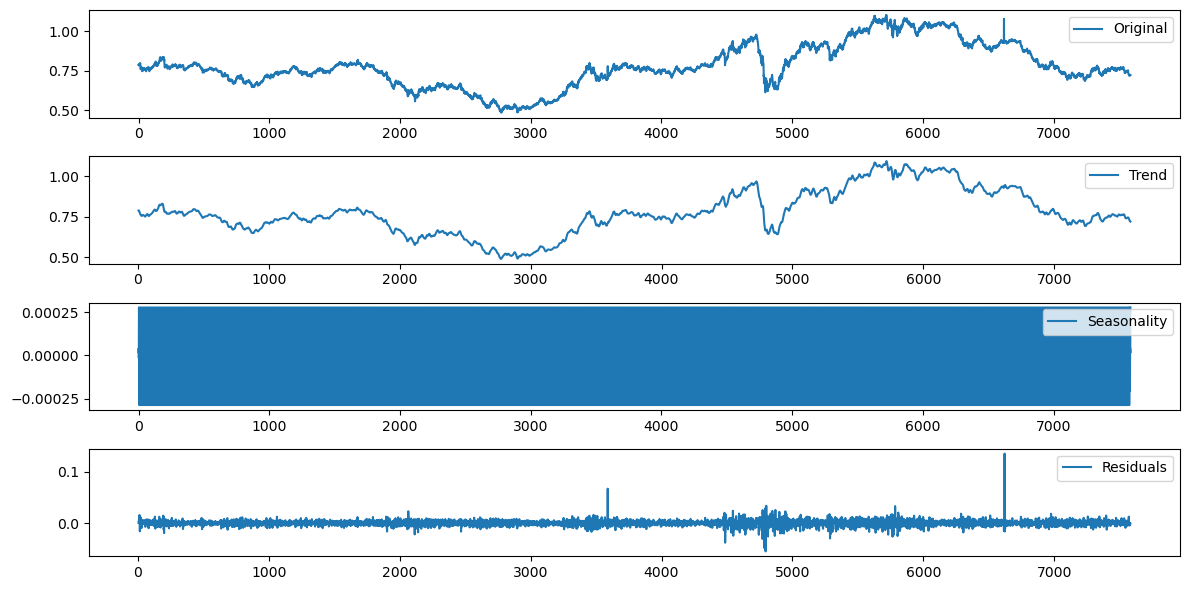

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(df['Ex_rate'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [34]:
model_type = 'SES'  # or 'HLES' or 'HWES'
if model_type == 'SES':
    model = SimpleExpSmoothing(df['Ex_rate'])
elif model_type == 'HLES':
    model = ExponentialSmoothing(df['Ex_rate'], trend='add')
elif model_type == 'HWES':
    model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', freq=12)

In [35]:
param_grid = {
    'smoothing_level': [0.1, 0.2, 0.3, 0.4, 0.5],
    'smoothing_slope': [0.1, 0.2, 0.3, 0.4, 0.5],
    'smoothing_seasonal': [0.1, 0.2, 0.3, 0.4, 0.5]
}

In [36]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [41]:
import itertools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
df = df.resample('M').mean()
best_aic = float('inf')
best_params = None
for params in itertools.product(*param_grid.values()):
    try:
        model = ExponentialSmoothing(
            df['Ex_rate'], 
            trend=params[0], 
            seasonal=params[1], 
            seasonal_periods=params[2]).fit()
        aic = model.aic
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except Exception as e:
        print(f"Model with params {params} failed: {e}")
        
print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")        

Model with params (0.1, 0.1, 0.1) failed: trend must be a string or None
Model with params (0.1, 0.1, 0.2) failed: trend must be a string or None
Model with params (0.1, 0.1, 0.3) failed: trend must be a string or None
Model with params (0.1, 0.1, 0.4) failed: trend must be a string or None
Model with params (0.1, 0.1, 0.5) failed: trend must be a string or None
Model with params (0.1, 0.2, 0.1) failed: trend must be a string or None
Model with params (0.1, 0.2, 0.2) failed: trend must be a string or None
Model with params (0.1, 0.2, 0.3) failed: trend must be a string or None
Model with params (0.1, 0.2, 0.4) failed: trend must be a string or None
Model with params (0.1, 0.2, 0.5) failed: trend must be a string or None
Model with params (0.1, 0.3, 0.1) failed: trend must be a string or None
Model with params (0.1, 0.3, 0.2) failed: trend must be a string or None
Model with params (0.1, 0.3, 0.3) failed: trend must be a string or None
Model with params (0.1, 0.3, 0.4) failed: trend mus

In [47]:
if best_params is not None:
    model = ExponentialSmoothing(
        df['Ex_rate'], 
        trend=best_params[0], 
        seasonal=best_params[1], 
        seasonal_periods=best_params[2]
    )
    
    model_fit = model.fit()
    print(f"Model fit successful with params: {best_params}")
else:
    print("No valid model parameters were found.")    

No valid model parameters were found.


In [50]:
forecast = model_fit.forecast(steps=3)
forecast

6070    1.023685
6071    1.023606
6072    1.023653
Name: predicted_mean, dtype: float64

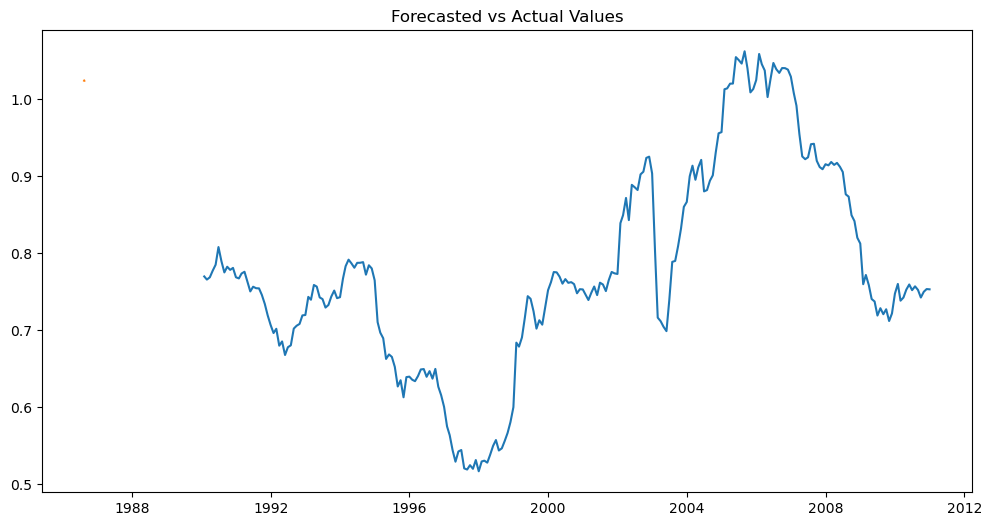

In [51]:
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'])
plt.plot(forecast)
plt.title('Forecasted vs Actual Values')
plt.show()

# Evaluation and Comparison

In [52]:
from statsmodels.tsa.arima.model import ARIMA
arima_model_fit = ARIMA(df['Ex_rate'], order=(1,1,1)).fit()
arima_forecast = arima_model_fit.forecast(steps=len(df))

In [53]:
arima_forecast

2011-01-31    0.753305
2011-02-28    0.753543
2011-03-31    0.753698
2011-04-30    0.753799
2011-05-31    0.753865
                ...   
2031-08-31    0.753987
2031-09-30    0.753987
2031-10-31    0.753987
2031-11-30    0.753987
2031-12-31    0.753987
Freq: M, Name: predicted_mean, Length: 252, dtype: float64

In [54]:
arima_model_fit

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
es_model_fit = ExponentialSmoothing(df['Ex_rate'], seasonal_periods=12).fit()
es_forecast = es_model_fit.forecast(steps=len(df))

In [56]:
es_model_fit

In [57]:
es_forecast

2011-01-31    0.75294
2011-02-28    0.75294
2011-03-31    0.75294
2011-04-30    0.75294
2011-05-31    0.75294
               ...   
2031-08-31    0.75294
2031-09-30    0.75294
2031-10-31    0.75294
2031-11-30    0.75294
2031-12-31    0.75294
Freq: M, Length: 252, dtype: float64

In [58]:
arima_mae = (np.abs(df - arima_forecast)).mean()
arima_rmse = np.sqrt(((df - arima_forecast) ** 2).mean())
arima_mape = (((np.abs((df - arima_forecast) / df))).mean()) 

In [59]:
arima_mae

2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64

In [60]:
arima_rmse

2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64

In [61]:
arima_mape

2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64

In [62]:
es_mae = (np.abs(df - arima_forecast)).mean()
es_rmse = np.sqrt(((df - arima_forecast) ** 2).mean())
es_mape = (((np.abs((df - arima_forecast) / df))).mean()) * 100es_mae

In [63]:
es_mae

2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64

In [64]:
es_rmse

2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64

In [65]:
es_mape

2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64

In [66]:
print('ARIMA Error Metrics:')
print('MAE:', arima_mae)
print('RMSE:', arima_rmse)
print('MAPE:', arima_mape)

ARIMA Error Metrics:
MAE: 2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64
RMSE: 2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64
MAPE: 2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64


In [67]:
print('Exponential Smoothing Error Metrics:')
print('MAE:', es_mae)
print('RMSE:', es_rmse)
print('MAPE:', es_mape)

Exponential Smoothing Error Metrics:
MAE: 2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64
RMSE: 2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64
MAPE: 2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
2011-04-30 00:00:00   NaN
2011-05-31 00:00:00   NaN
                       ..
2031-09-30 00:00:00   NaN
2031-10-31 00:00:00   NaN
2031-11-30 00:00:00   NaN
2031-12-31 00:00:00   NaN
Ex_rate               NaN
Length: 253, dtype: float64


In [68]:
if arima_mae.values[0] < es_mae.values[0]:
    print('ARIMA has lower MAE')
elif arima_mae.values[0] > es_mae.values[0]:
    print('Exponential Smoothing has lower MAE')
else:
    print('Both models have equal MAE')

Both models have equal MAE


In [69]:
arima_mae_mean = np.mean(arima_mae)
es_mae_mean = np.mean(es_mae)

if arima_mae_mean < es_mae_mean:
    print('ARIMA has lower MAE')
elif arima_mae_mean > es_mae_mean:
    print('Exponential Smoothing has lower MAE')
else:
    print('Both models have equal MAE')

Both models have equal MAE


In [70]:
if arima_mae.mean() < es_mae.mean():
    print('ARIMA has lower MAE')
elif arima_mae.mean() > es_mae.mean():
    print('Exponential Smoothing has lower MAE')
else:
    print('Both models have equal MAE')

Both models have equal MAE


In [71]:
print('ARIMA Advantages:')
print('Can handle complex patterns and seasonality')
print('Can provide accurate long-term forecasts')

ARIMA Advantages:
Can handle complex patterns and seasonality
Can provide accurate long-term forecasts


In [72]:
print('ARIMA Limitations:')
print('Requires careful parameter tuning')
print('Can be sensitive to outliers and missing values')

ARIMA Limitations:
Requires careful parameter tuning
Can be sensitive to outliers and missing values


In [73]:
print('Exponential Smoothing Advantages:')
print('Simple and easy to implement')
print('Can handle missing values and outliers')

Exponential Smoothing Advantages:
Simple and easy to implement
Can handle missing values and outliers


In [74]:
print('Exponential Smoothing Limitations:')
print('Assumes a constant trend and seasonality')
print('May not perform well with complex patterns')

Exponential Smoothing Limitations:
Assumes a constant trend and seasonality
May not perform well with complex patterns


In [75]:
print('Summary:')
print('ARIMA and Exponential Smoothing models were compared for forecasting exchange rates')
print('Error metrics (MAE, RMSE, MAPE) were used to evaluate the models')

Summary:
ARIMA and Exponential Smoothing models were compared for forecasting exchange rates
Error metrics (MAE, RMSE, MAPE) were used to evaluate the models


In [76]:
if (arima_mae.mean() < es_mae.mean()) and (arima_rmse.mean() < es_rmse.mean()) and (arima_mape.mean() < es_mape.mean()):
    print('ARIMA model yielded the best performance for forecasting exchange rates')
elif (es_mae.mean() < arima_mae.mean()) and (es_rmse.mean() < arima_rmse.mean()) and (es_mape.mean() < arima_mape.mean()):
    print('Exponential Smoothing model yielded the best performance for forecasting exchange rates')
else:
    print('Both models performed equally well for forecasting exchange rates')

Both models performed equally well for forecasting exchange rates
